In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries and Modules for Image Classification with Deep Learning

In [4]:
import numpy as np  #Imports the NumPy library for numerical computations and array operations.
import pandas as pd #Imports the pandas library for data manipulation and analysis.
import os #Imports the os module for interacting with the operating system
from os import listdir  #Imports the listdir function from the os module to retrieve a list of files in a directory.
import tensorflow as tf #Imports the TensorFlow library for building and training deep learning models.
from keras.preprocessing.image import ImageDataGenerator # Imports the ImageDataGenerator class from the Keras library for image data augmentation
import cv2  #Imports the OpenCV library for image processing tasks
import matplotlib.pyplot as plt # Imports the pyplot module from the matplotlib library for data visualization.
%matplotlib inline
 # Sets the backend of matplotlib to display plots inline in the Jupyter Notebook.
import imutils #Imports the imutils library for image resizing and manipulation
import shutil
from tensorflow.keras import models,layers  #Imports the models and layers modules from the TensorFlow Keras API for model construction.

from tensorflow.keras.models import Model,load_model #Imports the Model class and the load_model function from TensorFlow Keras for model definition and loading pre-trained models.
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D #Imports various layer types from TensorFlow Keras for building the model architecture.
from sklearn.model_selection import train_test_split #Imports the train_test_split function from scikit-learn for splitting the dataset into training and validation sets.
from sklearn.utils import shuffle #shuffling the data improves the model
import warnings #Imports the warnings module for handling warning messages.
from keras.utils import to_categorical #Imports the to_categorical function from Keras for one-hot encoding categorical labels.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau #Imports the EarlyStopping and ReduceLROnPlateau callback functions from Keras for model training control.
warnings.filterwarnings('ignore')

# Changing the Working Directory to Dataset Directory

In [5]:
import os
IMG_PATH="/content/drive/MyDrive/dataset"  #path to the directory containing the dataset
os.chdir(IMG_PATH)  #Changes the current working directory to the specified IMG_PATH

# Displaying Random Images from the Dataset with Labels

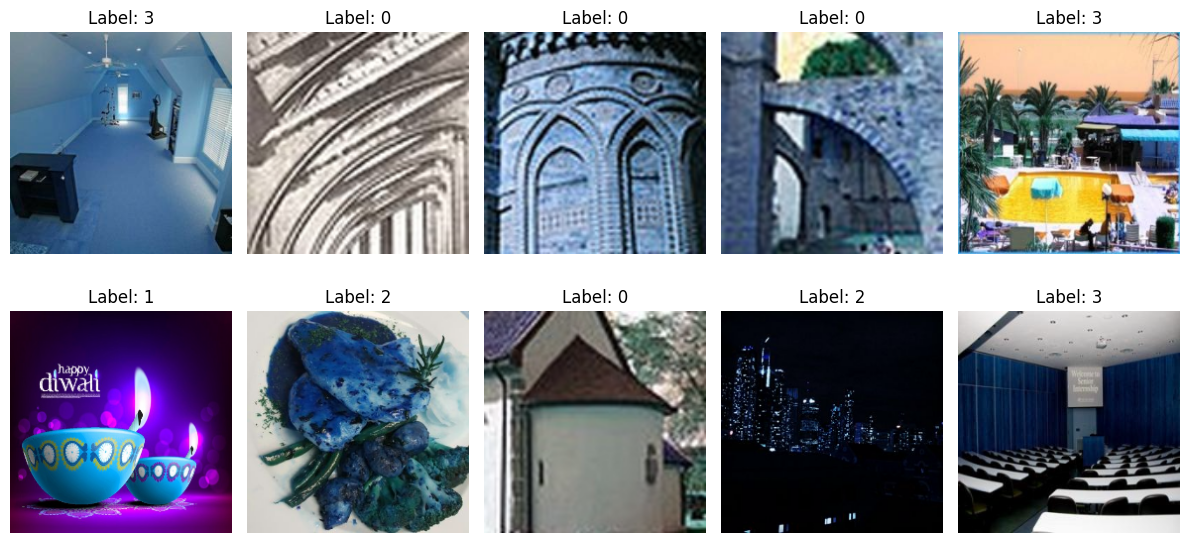

In [7]:
import random
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

categories = ["architecture", "art_and_culture", "food_and_drinks", "travel_and_adventure"]
labels = [0, 1, 2, 3]
img_width = 224
img_height = 224

# Load the images and assign labels
images = []
labels_list = []
for category, label in zip(categories, labels):
    category_path = os.path.join(IMG_PATH, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        images.append(image)
        labels_list.append(label)

# Choose 10 random indices
random_indices = random.sample(range(len(images)), 10)

# Display the images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    image = images[idx]
    label = labels_list[idx]
    axes[i].imshow(image)
    axes[i].set_title("Label: {}".format(label))
    axes[i].axis("off")

plt.tight_layout()
plt.show()


# Image Augmentation Visualization Samples






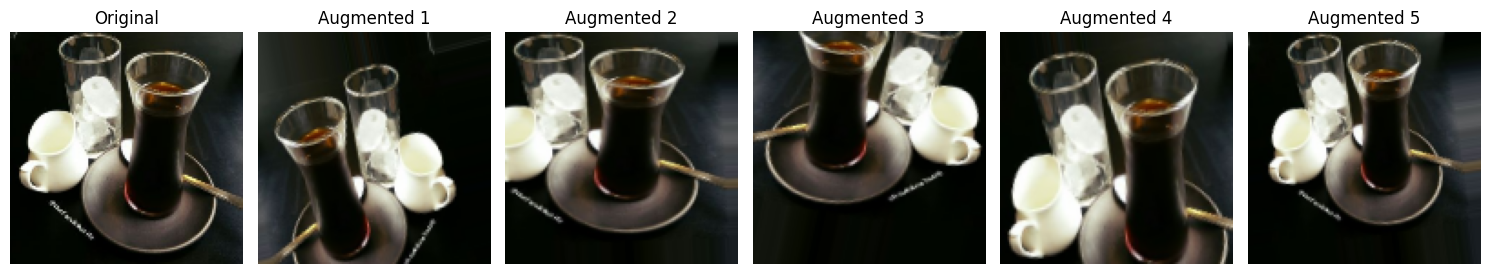

In [3]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

categories = ["architecture", "art_and_culture", "food_and_drinks", "travel_and_adventure"]
labels = [0, 1, 2, 3]
img_width = 224
img_height = 224

# Load the images and assign labels
images = []
labels_list = []
for category, label in zip(categories, labels):
    category_path = os.path.join(IMG_PATH, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        images.append(image)
        labels_list.append(label)



# Choose a random image from the dataset
random_index = random.randint(0, len(images) - 1)
image = images[random_index]

# Preprocess the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (img_width, img_height))

# Create an ImageDataGenerator with desired augmentation settings
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Reshape the image to match the expected input shape of the generator
image = image.reshape((1,) + image.shape)

# Generate augmented images from the original image
augmented_images = []
for batch in datagen.flow(image, batch_size=1):
    augmented_images.append(batch)
    if len(augmented_images) >= 5:  # Generate 5 augmented images for visualization
        break



# Display the original image and its augmented versions
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
axes[0].imshow(image[0])
axes[0].set_title("Original")
axes[0].axis("off")

for i, augmented_image in enumerate(augmented_images):
    axes[i+1].imshow(augmented_image[0])
    axes[i+1].set_title(f"Augmented {i+1}")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()


# Augmentation Of All Dataset

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

categories = ["architecture", "art_and_culture", "food_and_drinks", "travel_and_adventure"]
labels = [0, 1, 2, 3]
img_width = 224
img_height = 224
images_list = []
labels_list = []


for category, label in zip(categories, labels):
    category_path = os.path.join(IMG_PATH, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)

        # Check if the image size is empty
        if image is not None and image.size > 0:
            image = cv2.GaussianBlur(image, (5, 5), 0) #reduce image noise and smooth out the details in an image.
            image = cv2.resize(image, (img_width, img_height))
            images_list.append(image)
            labels_list.append(label)
        else:
            print("Empty image:", image_path)
            # Delete the empty image file
            os.remove(image_path)



# Preprocess and augment the images
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True

)





augmented_images = []
augmented_labels = []

for image, label in zip(images_list, labels_list):
    image = image.reshape((1,) + image.shape)

    # Generate augmented images from the original image
    for batch in datagen.flow(image, batch_size=16):
        augmented_images.append(batch[0])
        augmented_labels.append(label)
        if len(augmented_images) >= 2.5 * len(images_list):  # augmented images for each original image
            break
# Convert the images to numpy arrays
images_list = np.array(augmented_images)
labels = np.array(augmented_labels)


# Data Splitting into Training and Validation Sets

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_list, labels, test_size=0.3, random_state=42)

# Further Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)




# Print the shapes of the resulting sets
print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
#print("Test data shape:", X_test.shape)
#print("Test labels shape:", y_test.shape)


Train data shape: (1175, 224, 224, 3)
Train labels shape: (1175,)
Validation data shape: (504, 224, 224, 3)
Validation labels shape: (504,)


In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))


# Distribution of Image Ratios

In [ ]:
RATIO_LIST = []
for set in (X_train, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])

plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [ ]:
class_names = categories  # Replace with your actual list of category names
print(class_names)

# Building Model Based on CNN (Convolution Neural Network) LAYERS

In [8]:
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam

from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

def create_model1():
  # Define the model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.6))
    model.add(layers.Dense(4, activation='softmax'))

    optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Normalization Of Train And Validation Data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the train_data to 2D array
train_data_2d = X_train.reshape(X_train.shape[0], -1)
val_data_2d = X_val.reshape(X_val.shape[0], -1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the train_data
scaler.fit(train_data_2d)
scaler.fit(val_data_2d)
# Normalize the train_data
train_data_normalized = scaler.transform(train_data_2d)
val_data_normalized = scaler.transform(val_data_2d)

# Reshape the train_data_normalized back to its original shape
X_train = train_data_normalized.reshape(X_train.shape)
X_val = val_data_normalized.reshape(X_val.shape)

# Model Training with Early Stopping and Learning Rate Reduction

In [9]:
early_stop = EarlyStopping(monitor='val_loss', mode='max', patience=6)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1, min_lr=1e-6,  verbose=1  )
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
##
model = create_model1()
history = model.fit(X_train, y_train_categorical, epochs=15,
                    validation_data=(X_val, y_val_categorical),
                    callbacks=[learning_rate_reduction])

Epoch 1/15
37/37 [==============================] - 137s 4s/step - loss: 1.6896 - accuracy: 0.8000 - val_loss: 1.0306 - val_accuracy: 0.7837 - lr: 0.0010
Epoch 2/15
37/37 [==============================] - 140s 4s/step - loss: 0.5008 - accuracy: 0.8417 - val_loss: 1.4146 - val_accuracy: 0.0714 - lr: 0.0010
Epoch 3/15
37/37 [==============================] - 141s 4s/step - loss: 0.4402 - accuracy: 0.8477 - val_loss: 0.7660 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 4/15
37/37 [==============================] - 139s 4s/step - loss: 0.3533 - accuracy: 0.8613 - val_loss: 1.0513 - val_accuracy: 0.8135 - lr: 0.0010
Epoch 5/15
37/37 [==============================] - 139s 4s/step - loss: 0.3761 - accuracy: 0.8672 - val_loss: 0.5565 - val_accuracy: 0.7996 - lr: 0.0010
Epoch 6/15
37/37 [==============================] - 137s 4s/step - loss: 0.3549 - accuracy: 0.8664 - val_loss: 1.2843 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 7/15
37/37 [==============================] - ETA: 0s - loss: 0.3075 -

# Saving the Model






In [10]:
model.save('LastModel__.h5')


# model.summary()

# Model Evaluation

In [16]:

results = model.evaluate(X_val,y_val_categorical, verbose=2)

print("    val Loss: {:.5f}".format(results[0]))
print("val Accuracy: {:.2f}%".format(results[1] * 100))

16/16 - 19s - loss: 0.2730 - accuracy: 0.9008 - 19s/epoch - 1s/step
    val Loss: 0.27297
val Accuracy: 90.08%


# Plotting Training and Validation Metrics






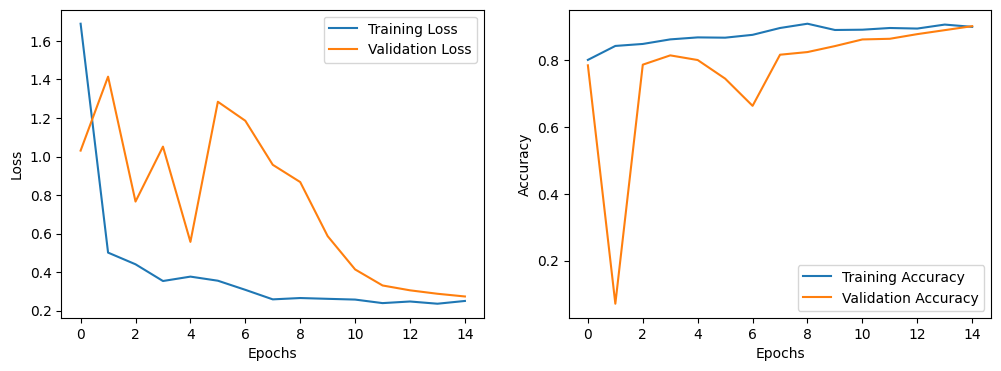

In [12]:
import matplotlib.pyplot as plt


# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


# Model Prediction

In [13]:
pred = model.predict(X_val)
pred = np.argmax(pred,axis=1)

y_test_new = np.argmax(y_val_categorical,axis=1)

16/16 [==============================] - 13s 807ms/step


# Classification Report and Confusion Matrix

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       393
           1       0.96      0.69      0.81        39
           2       0.50      0.88      0.64        32
           3       0.69      0.23      0.34        40

    accuracy                           0.90       504
   macro avg       0.78      0.70      0.69       504
weighted avg       0.91      0.90      0.89       504



# Making Predictions and Comparing with Original Labels

In [15]:
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Load the saved model
#model = keras.models.load_model('your_model_path.h5')

# Make predictions on new data
predictions = model.predict(X_val)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

label_encoder = LabelEncoder()
label_encoder.fit(y_val)
predicted_categories = label_encoder.inverse_transform(predicted_labels)

# Print the original labels and predicted labels
for original_label, predicted_category in zip(y_val, predicted_categories):
    print("Original Label:", original_label)
    print("Predicted Category:", predicted_category)
    print("---")


16/16 [==============================] - 15s 922ms/step
Original Label: 3
Predicted Category: 3
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 3
Predicted Category: 2
---
Original Label: 0
Predicted Category: 0
---
Original Label: 3
Predicted Category: 3
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 0
Predicted Category: 0
---
Original Label: 1
Pr

# Making Prediction On New Image With Model Created

In [ ]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from PIL import Image
import numpy as np
from tensorflow import keras

from google.colab import files
from PIL import Image
import io
img_height = 128
img_width = 128
model = keras.models.load_model('/content/drive/MyDrive/dataset/my_model.h5')

# Upload the image file
uploaded = files.upload()

# Get the file name of the uploaded image
file_name = next(iter(uploaded))

# Read the uploaded image
image = Image.open(io.BytesIO(uploaded[file_name]))



# Open and preprocess the image
image = image.resize((img_width, img_height))
image = np.array(image)
image = image / 255.0


# Make a prediction
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction)

if predicted_class<0.5:
  print("Predicted class:", predicted_class,": architecture")
elif predicted_class<=1.5:
  print("Predicted class:", predicted_class,": art_and_culture")
elif predicted_class<=2.5:
  print("Predicted class:", predicted_class,": food_and_drinks")
elif predicted_class<=3.5:
  print("Predicted class:", predicted_class,": travel_and_adventure")
else:
  print("No Predicted class with this image")



confidence_score = prediction[0][predicted_class]

# Display the result

print("Confidence score:", confidence_score)
